<a href="https://colab.research.google.com/github/amsha16/MachineLearningTF/blob/master/5b_CreditCard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPool1D, Input
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras import regularizers

In [2]:
print(tf.__version__)

2.2.0


In [0]:
!pip install -q kaggle

In [14]:
!ls -l .kaggle

total 4
-rw-r--r-- 1 root root 63 Jun 10 12:22 kaggle.json


In [0]:
!mv kaggle.json .kaggle

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [17]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:00<00:00, 74.6MB/s]
100% 66.0M/66.0M [00:00<00:00, 96.4MB/s]


In [21]:
!unzip  creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [0]:
credit_data = pd.read_csv("creditcard.csv",parse_dates=True)

In [6]:
credit_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
credit_data = credit_data.drop(['Time'], axis=1)

In [0]:
X_train, X_test = train_test_split(credit_data, test_size=0.25, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

In [9]:
X_train.shape, X_test.shape

((213226, 29), (71202, 29))

In [10]:
credit_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Balancing data

In [0]:
non_fraud = credit_data[credit_data['Class']==0]
fraud = credit_data[credit_data['Class']==1]

In [12]:
non_fraud.shape, fraud.shape

((284315, 30), (492, 30))

In [13]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 30)

Merging both datasets

In [14]:
data = fraud.append(non_fraud, ignore_index=True)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,-3.642777,-3.428046,-0.077182,1.096936,5.386344,-2.866854,-2.016909,-0.075653,-0.066591,-0.213231,-0.870053,0.434946,1.379925,-1.062280,0.747049,-0.036337,0.634672,-0.125323,1.439231,-0.368027,-0.470538,-0.966181,-0.580881,0.100787,-0.424474,0.392755,0.532933,0.056679,62.99,0
980,-1.487805,1.153361,1.766754,-1.842626,1.251140,1.072848,2.883501,-2.446128,3.845544,5.009713,1.262247,-0.737960,-0.492116,-3.383744,-0.194024,-0.553831,-2.376284,0.396380,-0.071425,1.702473,-0.596972,1.106413,-0.603324,0.230287,-0.419304,0.181660,-1.195708,-1.951939,95.80,0
981,1.300633,0.180831,0.048753,0.229102,0.159963,0.003099,-0.056511,0.007908,-0.157157,0.100715,0.464492,0.752002,0.583588,0.336149,0.400323,0.832487,-1.106505,0.315392,0.609576,-0.035855,-0.281059,-0.834393,-0.021566,-0.839019,0.348307,0.149058,-0.033336,-0.002761,1.29,0
982,0.358783,0.540759,0.180974,3.481706,2.748892,5.187147,-0.620869,1.072593,-1.224173,1.809873,-0.557344,-0.689807,0.082609,-0.150209,0.923597,-0.078719,-0.204871,0.406476,0.761310,0.311664,0.335538,1.189521,0.198243,0.711694,-1.739654,0.240587,0.232380,0.096533,15.09,0


In [15]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [0]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)


In [18]:
X_train.shape, X_test.shape

((787, 29), (197, 29))

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Another dimension for CNN

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
X_train.shape, X_test.shape

((787, 29, 1), (197, 29, 1))

In [0]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 28, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 28, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 27, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1728)              0

In [0]:
model.compile(optimizer=Adam(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/20
25/25 [==============================] - 0s 17ms/step - loss: 0.7702 - accuracy: 0.6976 - val_loss: 0.5889 - val_accuracy: 0.8477
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.4182 - accuracy: 0.8361 - val_loss: 0.5503 - val_accuracy: 0.8832
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3727 - accuracy: 0.8628 - val_loss: 0.5246 - val_accuracy: 0.9086
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3628 - accuracy: 0.8869 - val_loss: 0.5026 - val_accuracy: 0.9036
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3349 - accuracy: 0.8806 - val_loss: 0.4732 - val_accuracy: 0.8934
Epoch 6/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3060 - accuracy: 0.8869 - val_loss: 0.4354 - val_accuracy: 0.9086
Epoch 7/20
25/25 [==============================] - 0s 10ms/step - loss: 0.3091 - accuracy: 0.8831 - val_loss: 0.4100 - val_accuracy: 0.8985
Epoch 8/20
25/25 [

In [0]:
def plot_learningCurve(history, epochs):
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.show()

    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.show()

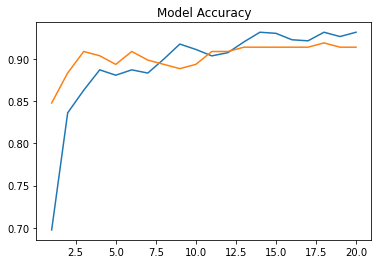

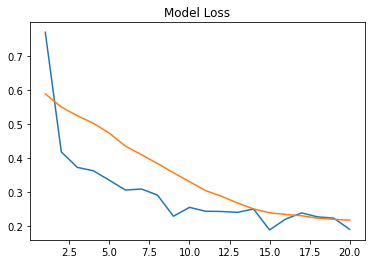

In [28]:
plot_learningCurve(history, 20)

Adding Maxpool

In [32]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 28, 32)            96        
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 32)            128       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 14, 32)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 32)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 13, 64)            4160      
_________________________________________________________________
batch_normalization_7 (Batch (None, 13, 64)            256       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 6, 64)            

In [33]:
model.compile(optimizer=Adam(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/20
25/25 [==============================] - 0s 11ms/step - loss: 1.5904 - accuracy: 0.4981 - val_loss: 0.6933 - val_accuracy: 0.5279
Epoch 2/20
25/25 [==============================] - 0s 6ms/step - loss: 1.3112 - accuracy: 0.5909 - val_loss: 0.6657 - val_accuracy: 0.6244
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.9737 - accuracy: 0.6252 - val_loss: 0.6455 - val_accuracy: 0.6294
Epoch 4/20
25/25 [==============================] - 0s 6ms/step - loss: 0.7835 - accuracy: 0.6861 - val_loss: 0.6294 - val_accuracy: 0.6294
Epoch 5/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6675 - accuracy: 0.7090 - val_loss: 0.6144 - val_accuracy: 0.6294
Epoch 6/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6947 - accuracy: 0.7357 - val_loss: 0.5958 - val_accuracy: 0.6447
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 0.5547 - accuracy: 0.7878 - val_loss: 0.5736 - val_accuracy: 0.6650
Epoch 8/20
25/25 [=

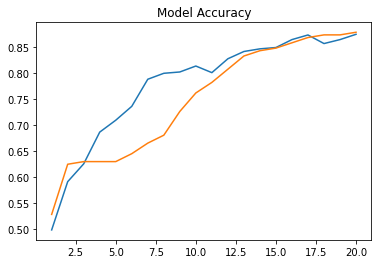

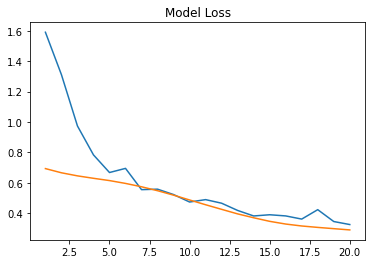

In [34]:
plot_learningCurve(history, 20)

WITHOUT DATA BALANCING

In [0]:
X = credit_data.drop('Class', axis = 1)
y = credit_data['Class']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)


In [53]:
X_train.shape, X_test.shape

((227845, 29), (56962, 29))

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  #ONLY for CNN Models
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [47]:
hist2 = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/20
7121/7121 [==============================] - 34s 5ms/step - loss: 0.0331 - accuracy: 0.9921 - val_loss: 0.0087 - val_accuracy: 0.9992
Epoch 2/20
7121/7121 [==============================] - 33s 5ms/step - loss: 0.0073 - accuracy: 0.9990 - val_loss: 0.0060 - val_accuracy: 0.9993
Epoch 3/20
7121/7121 [==============================] - 33s 5ms/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0062 - val_accuracy: 0.9993
Epoch 4/20
7121/7121 [==============================] - 34s 5ms/step - loss: 0.0057 - accuracy: 0.9992 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 5/20
7121/7121 [==============================] - 33s 5ms/step - loss: 0.0053 - accuracy: 0.9992 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 6/20
7121/7121 [==============================] - 33s 5ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 7/20
7121/7121 [==============================] - 33s 5ms/step - loss: 0.0049 - accuracy: 0.9993 - val_loss: 0.0042 - val_ac

Encoder Model

In [0]:
layer_input = Input(shape= 29)
layer_encoder = Dense(14, activation="tanh",  activity_regularizer=regularizers.l1(10e-5))(layer_input)

layer_encoder = Dense(int(14 / 2), activation="relu")(layer_encoder)
layer_decoder = Dense(int(14 / 2), activation='tanh')(layer_encoder)
layer_decoder = Dense(29, activation='relu')(layer_decoder)
autoencoder = Model(inputs=layer_input, outputs=layer_decoder)

In [64]:
X_train.shape

(227845, 29)

In [0]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [66]:
history = autoencoder.fit(X_train, y_train, epochs=20, batch_size=32,  shuffle=True, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0014 - accuracy: 0.9314 - val_loss: 9.4213e-04 - val_accuracy: 0.9980
Epoch 2/20
7121/7121 [==============================] - 12s 2ms/step - loss: 9.1623e-04 - accuracy: 0.9975 - val_loss: 9.4044e-04 - val_accuracy: 0.9980
Epoch 3/20
7121/7121 [==============================] - 12s 2ms/step - loss: 9.1123e-04 - accuracy: 0.9979 - val_loss: 9.7747e-04 - val_accuracy: 0.9978
Epoch 4/20
7121/7121 [==============================] - 12s 2ms/step - loss: 9.1498e-04 - accuracy: 0.9979 - val_loss: 9.3761e-04 - val_accuracy: 0.9980
Epoch 5/20
7121/7121 [==============================] - 12s 2ms/step - loss: 9.1116e-04 - accuracy: 0.9979 - val_loss: 9.3974e-04 - val_accuracy: 0.9980
Epoch 6/20
7121/7121 [==============================] - 12s 2ms/step - loss: 9.1405e-04 - accuracy: 0.9979 - val_loss: 9.9683e-04 - val_accuracy: 0.9980
Epoch 7/20
7121/7121 [==============================] - 12s 2ms/step - loss: 9.0342e-0

In [0]:
#TODO Check against Kaggle Leaderboard